# Generative Models

	• Class Conditional Density Estimation
	• Gaussian Discriminant Analysis
	• Decision Boundaries from Probabilistic Models
	• Python: GDA with Matrix Algebra




Here’s a detailed and Jupyter Notebook–ready explanation of Generative Models, formatted in Markdown with LaTeX math and Python code, especially suited for financial forecasting students.

⸻

Generative Models

⸻

1. Class Conditional Density Estimation

Generative models estimate the joint probability:

$$
p(x, y) = p(x \mid y) \cdot p(y)
$$

From this, we compute the posterior using Bayes’ Rule:

$$
p(y \mid x) = \frac{p(x \mid y) \cdot p(y)}{p(x)}
$$
	•	Discriminative Models: Directly model $p(y \mid x)$
	•	Generative Models: Model $p(x \mid y)$ and $p(y)$

Applications:
	•	Naive Bayes
	•	Gaussian Discriminant Analysis (GDA)

⸻

2. Gaussian Discriminant Analysis (GDA)

Assume:
	•	$y \in {0, 1}$
	•	$x \in \mathbb{R}^n$
	•	Class conditional densities: $x \mid y = k \sim \mathcal{N}(\mu_k, \Sigma)$
	•	Shared covariance $\Sigma$

Model Parameters:
	•	$\phi = p(y = 1)$
	•	$\mu_0 = \mathbb{E}[x \mid y = 0]$
	•	$\mu_1 = \mathbb{E}[x \mid y = 1]$
	•	$\Sigma = \mathbb{E}[(x - \mu_y)(x - \mu_y)^T \mid y]$

Class Conditional Likelihood:

$$
p(x \mid y = k) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_k)^T \Sigma^{-1}(x - \mu_k)\right)
$$

⸻

3. Decision Boundaries from Probabilistic Models

Use Bayes’ Rule:

$$
p(y=1 \mid x) = \frac{p(x \mid y=1)p(y=1)}{p(x \mid y=0)p(y=0) + p(x \mid y=1)p(y=1)}
$$

The decision boundary is where:

$$
p(y=1 \mid x) = p(y=0 \mid x)
$$

This simplifies to:

$$
(x - \mu_0)^T \Sigma^{-1}(x - \mu_0) - (x - \mu_1)^T \Sigma^{-1}(x - \mu_1) = \log\left(\frac{1 - \phi}{\phi}\right)
$$

This is a linear decision boundary when $\Sigma$ is shared.

⸻

4. Python: GDA with Matrix Algebra

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det

# Simulate 2D data
np.random.seed(0)
n = 100
mu0 = np.array([1, 2])
mu1 = np.array([3, 4])
Sigma = np.array([[1, 0.5], [0.5, 1]])

X0 = np.random.multivariate_normal(mu0, Sigma, n)
X1 = np.random.multivariate_normal(mu1, Sigma, n)
X = np.vstack((X0, X1))
y = np.array([0]*n + [1]*n)

# Estimate parameters
phi = np.mean(y)
mu0_hat = X[y == 0].mean(axis=0)
mu1_hat = X[y == 1].mean(axis=0)

def compute_sigma(X, y, mu0, mu1):
    m = len(y)
    Sigma = np.zeros((2, 2))
    for i in range(m):
        xi = X[i].reshape(-1, 1)
        mui = mu0.reshape(-1, 1) if y[i] == 0 else mu1.reshape(-1, 1)
        Sigma += (xi - mui) @ (xi - mui).T
    return Sigma / m

Sigma_hat = compute_sigma(X, y, mu0_hat, mu1_hat)

# Decision boundary
def decision_boundary(x):
    Sigma_inv = inv(Sigma_hat)
    term = (
        x @ Sigma_inv @ (mu1_hat - mu0_hat)
        - 0.5 * (mu1_hat.T @ Sigma_inv @ mu1_hat - mu0_hat.T @ Sigma_inv @ mu0_hat)
        - np.log((1 - phi) / phi)
    )
    return term

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], label='Class 1')

x_vals = np.linspace(-1, 6, 100)
y_vals = np.linspace(0, 7, 100)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
Z = np.array([decision_boundary(np.array([x, y])) for x, y in zip(X_vals.ravel(), Y_vals.ravel())])
Z = Z.reshape(X_vals.shape)
plt.contour(X_vals, Y_vals, Z, levels=[0], linewidths=2, colors='black')

plt.legend()
plt.title("Gaussian Discriminant Analysis with Linear Boundary")
plt.grid(True)
plt.show()



⸻

Would you like to explore Quadratic Discriminant Analysis (QDA) next, where $\Sigma_0 \ne \Sigma_1$?

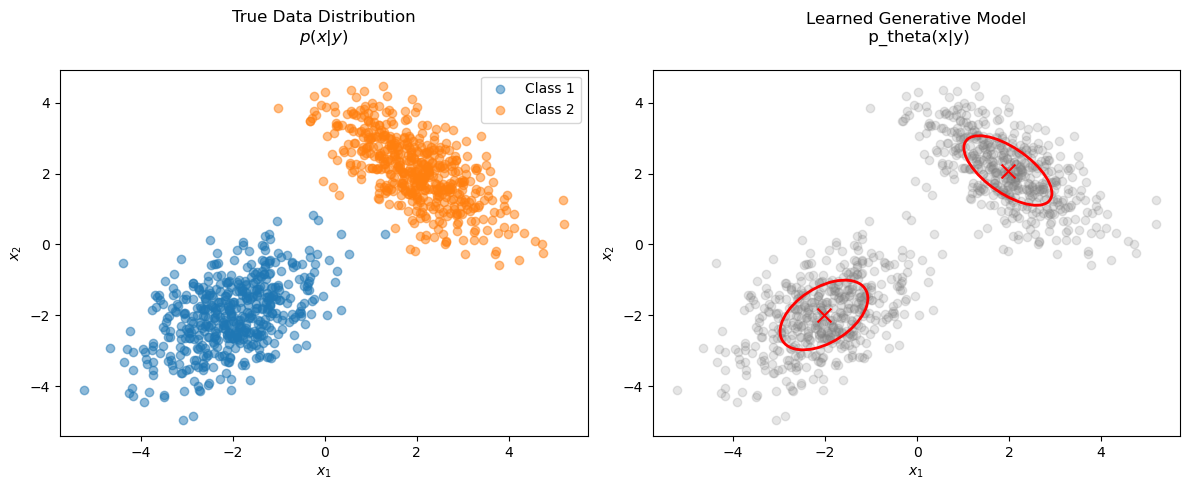

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Generate synthetic data from two Gaussians
np.random.seed(42)
n_samples = 500

# True distribution parameters
mu1, sigma1 = [-2, -2], [[1, 0.5], [0.5, 1]]  # $ \mathcal{N}(\mu_1, \Sigma_1) $
mu2, sigma2 = [2, 2], [[1, -0.7], [-0.7, 1]]    # $ \mathcal{N}(\mu_2, \Sigma_2) $

X1 = np.random.multivariate_normal(mu1, sigma1, n_samples)
X2 = np.random.multivariate_normal(mu2, sigma2, n_samples)
X = np.vstack([X1, X2])

# Fit GMM (generative model)
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

# Plotting
plt.figure(figsize=(12, 5))

# 1. Original Distribution
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.5, label='Class 2')
plt.title("True Data Distribution\n$p(x|y)$", pad=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()

# 2. Learned Generative Model
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, c='gray', label='Data')

# Plot GMM components
for i in range(gmm.n_components):
    # Draw ellipses for covariance matrices
    cov = gmm.covariances_[i]
    lam, v = np.linalg.eigh(cov)
    lam = 2 * np.sqrt(lam)  # 2*std for 95% confidence
    
    angle = np.degrees(np.arctan2(v[0, 1], v[0, 0]))
    ell = Ellipse(gmm.means_[i], lam[0], lam[1], angle=angle, 
                 edgecolor='r', facecolor='none', linewidth=2)
    plt.gca().add_patch(ell)
    plt.scatter(gmm.means_[i, 0], gmm.means_[i, 1], c='red', s=100, marker='x')

plt.title("Learned Generative Model\n p_theta(x|y)", pad=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.tight_layout()
plt.show()